In [10]:
import pandas as pd
import numpy as np
import csv

In [11]:
Number_one = pd.read_csv("List of number-one songs on Spotify.csv", encoding='latin1')
Most_streamed = pd.read_csv("Most-streamed songs.csv", encoding='latin1')

print(Number_one)
print(Most_streamed)

                                         Song  \
0                                     Starboy   
1                              Shape of You    
2                                      Humble   
3                           Despacito (remix)   
4                                    Mi Gente   
..                                        ...   
100                                 Yes, And?   
101                              La Diabla(2)   
102                          Beautiful Things   
103  We Can't Be Friends (Wait for Your Love)   
104                      Beautiful Things(2)#   

                                              Artist Release Date Issue Date  \
0                       The WeekndfeaturingDaft Punk    21-Sep-16  29-Dec-16   
1                                         Ed Sheeran    06-Jan-17  12-Jan-17   
2                                     Kendrick Lamar    30-Mar-17  20-Apr-17   
3    Luis FonsifeaturingDaddy YankeeandJustin Bieber    17-Apr-17  27-Apr-17   
4          

In [12]:
#Remove last column of Most streamed data as it only consists of references
Most_streamed = Most_streamed.iloc[:, :-1]
print(Most_streamed)

     Rank                            Song                        Artist  \
0       1                 Blinding Lights                    The Weeknd   
1       2                    Shape of You                    Ed Sheeran   
2       3               Someone You Loved                 Lewis Capaldi   
3       4                       Sunflower  Post MalonefeaturingSwae Lee   
4       5                         Starboy  The WeekndfeaturingDaft Punk   
..    ...                             ...                           ...   
98     99  Montero (Call Me by Your Name)                     Lil Nas X   
99    100                Someone Like You                         Adele   
100   101                         Stiches                  Shawn Mendes   
101   102                   Before You Go                 Lewis Capaldi   
102   103                         The Box                   Roddy Ricch   

     Streams(billions) ReleaseDate  
0                4.158   29-Nov-19  
1                3.835   

In [13]:

merged_df = pd.merge(Number_one, Most_streamed, on=['Song'], how='inner')
print(merged_df)

                              Song                             Artist_x  \
0                          Starboy         The WeekndfeaturingDaft Punk   
1                           Humble                       Kendrick Lamar   
2                         Rockstar        Post Malonefeaturing21 Savage   
3                         Rockstar           DaBabyfeaturingRoddy Ricch   
4                           Havana    Camila CabellofeaturingYoung Thug   
5                       Better Now                          Post Malone   
6                        Sunflower         Post MalonefeaturingSwae Lee   
7                          7 Rings                        Ariana Grande   
8                          Bad Guy                        Billie Eilish   
9                          Circles                          Post Malone   
10                    Dance Monkey                          Tones and I   
11                         The Box                          Roddy Ricch   
12                       

In [15]:
# Calculate counts dynamically for each genre-artist pair
counts = Number_one.groupby(['Genre', 'Artist']).size().reset_index(name='Count')

# Calculate total count of artists for each genre
total_artists = counts.groupby('Genre')['Count'].sum().reset_index(name='Total_Artists')

# Sort the bars within each genre by the count of artists for each artist
counts_sorted = counts.sort_values(by=['Genre', 'Count'], ascending=[True, False])

# Sort the genres by the total count of artists
genre_order = total_artists.sort_values(by='Total_Artists', ascending=False)['Genre']

# Create an interactive bar chart using Plotly with customized colors and layout
fig = px.bar(counts_sorted, x='Genre', y='Count', title='Artist Distribution by Genre',
             color='Artist',  # Color bars by Artist
             color_discrete_sequence=['lightblue'],  # Set colors to green
             template='plotly_white',  # Setting background to white with black axis lines
             barmode='stack',  # Stack bars
             category_orders={"Genre": genre_order},  # Order the Genre categories
             labels={'Count': 'Number of Songs'}  # Update y-axis label
            )
fig.show()

In [16]:
import plotly.graph_objects as go

# Count the number of songs per artist
song_counts = Number_one['Artist'].value_counts().reset_index()
song_counts.columns = ['Artist', 'Song']

# Create a Treemap
fig = go.Figure(go.Treemap(
    labels=song_counts['Artist'],
    parents=[''] * len(song_counts),  # Since it's not hierarchical, all artists are at the same level
    values=song_counts['Song'],
    marker=dict(
        colorscale='Blues',  # You can change the colorscale here
        colorbar=dict(title='Number of Songs')
    ),
    textposition='middle center',  # Center the text within each treemap cell
    branchvalues='total'  # Align the squares in the Treemap
))

fig.update_layout(
    title='Treemap looking at the Artists who have had number one songs the most',
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins to provide more space for the title and labels
)

fig.show()


In [17]:
import plotly.graph_objects as go

# Count the number of songs per artist
song_counts = Most_streamed['Artist'].value_counts().reset_index()
song_counts.columns = ['Artist', 'Song']

# Create a Treemap
fig = go.Figure(go.Treemap(
    labels=song_counts['Artist'],
    parents=[''] * len(song_counts),  # Since it's not hierarchical, all artists are at the same level
    values=song_counts['Song'],
    marker=dict(
        colorscale='Blues',  # You can change the colorscale here
        colorbar=dict(title='Number of Songs')
    ),
    textposition='middle center',  # Center the text within each treemap cell
    branchvalues='total'  # Align the squares in the Treemap
))

fig.update_layout(
    title='Treemap of the artists of songs that have had the most streams',
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins to provide more space for the title and labels
)

fig.show()


In [76]:
import plotly.graph_objects as go

# Count the number of songs per artist for Number One songs
song_counts_number_one = Number_one['Artist'].value_counts().reset_index()
song_counts_number_one.columns = ['Artist', 'Song']

# Count the number of songs per artist for Most Streamed songs
song_counts_most_streamed = Most_streamed['Artist'].value_counts().reset_index()
song_counts_most_streamed.columns = ['Artist', 'Song']

# Create the first Treemap for Number One Songs
fig1 = go.Figure(go.Treemap(
    labels=song_counts_number_one['Artist'],
    parents=[''] * len(song_counts_number_one),
    values=song_counts_number_one['Song'],
    marker=dict(
        colorscale='Blues',
        colorbar=dict(title='Number of Songs')
    ),
    textposition='middle center',
    branchvalues='total',
))

fig1.update_layout(
    title='Artists with Number One Songs',
    height=500,
    width=800,  # Adjust the width to fit side by side
    margin=dict(t=50, b=50, l=50, r=50),
)

# Create the second Treemap for Most Streamed Songs
fig2 = go.Figure(go.Treemap(
    labels=song_counts_most_streamed['Artist'],
    parents=[''] * len(song_counts_most_streamed),
    values=song_counts_most_streamed['Song'],
    marker=dict(
        colorscale='Blues',
        colorbar=dict(title='Number of Songs')
    ),
    textposition='middle center',
    branchvalues='total',
))

fig2.update_layout(
    title='Artists with Most Streamed Songs',
    height=500,
    width=800,  
    margin=dict(t=50, b=50, l=50, r=50),
)

# Show both plots side by side
fig1.show()
fig2.show()
 

In [18]:
import plotly.graph_objects as go
from collections import Counter
import plotly.colors as pc

# Extract month from the date column
Number_one['Month'] = Number_one['Release Date'].str.split('-').str[1]

# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Count the frequency of each month
month_counts = Counter(Number_one['Month'])

# Sort the months in chronological order
months_sorted = sorted(month_counts.keys(), key=lambda x: month_order.index(x))

# Get the corresponding counts for each month
counts_sorted = [month_counts[month] for month in months_sorted]

# Create a custom color scale
max_songs = max(counts_sorted)
color_scale = [pc.sequential.Blues[int(song / max_songs * (len(pc.sequential.Blues) - 1))] for song in counts_sorted]

# Create a bar chart with custom colors
fig = go.Figure(go.Bar(
    x=months_sorted,
    y=counts_sorted,
    marker=dict(color=color_scale),
))

fig.update_layout(
    title='Number of Songs Released Each Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Songs'),
    height=600,  # Adjust height
    width=800,   # Adjust width
)

fig.show()


In [19]:

# Extract month from the date column
Most_streamed['Month'] = Most_streamed['ReleaseDate'].str.split('-').str[1]

# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Count the frequency of each month
month_counts = Counter(Most_streamed['Month'])

# Sort the months in chronological order
months_sorted = sorted(month_counts.keys(), key=lambda x: month_order.index(x))

# Get the corresponding counts for each month
counts_sorted = [month_counts[month] for month in months_sorted]

# Create a custom color scale
max_songs = max(counts_sorted)
color_scale = [pc.sequential.Blues[int(song / max_songs * (len(pc.sequential.Blues) - 1))] for song in counts_sorted]

# Create a bar chart with custom colors
fig = go.Figure(go.Bar(
    x=months_sorted,
    y=counts_sorted,
    marker=dict(color=color_scale),
))

fig.update_layout(
    title='Number of Songs Released Each Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Songs'),
    height=600,  # Adjust height
    width=800,   # Adjust width
)

fig.show()

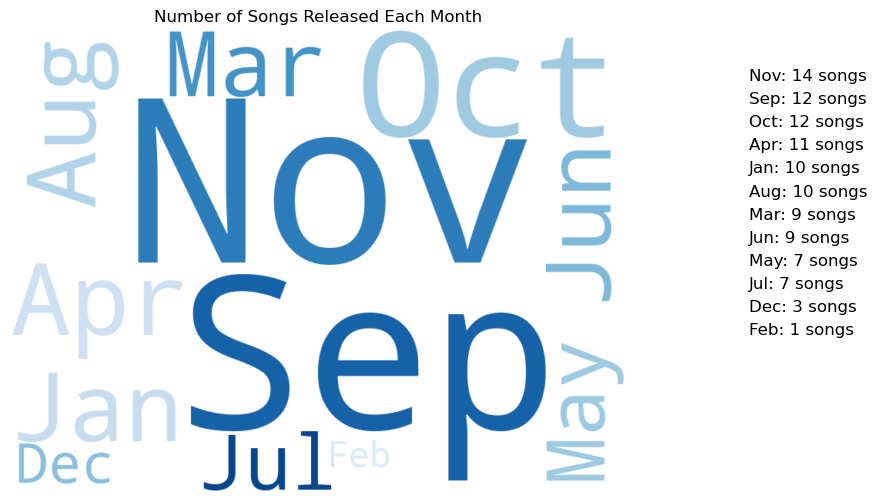

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each month
month_counts = Counter(Number_one['Month'])

# Sort the month counts by the count values in descending order
sorted_month_counts = dict(sorted(month_counts.items(), key=lambda x: x[1], reverse=True))

# Create a WordCloud object with a blue colormap
wordcloud = WordCloud(width=800, height=600, colormap='Blues', background_color='white').generate_from_frequencies(sorted_month_counts)

# Display the WordCloud
plt.figure(figsize=(8, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Number of Songs Released Each Month')

# Annotate the WordCloud with the count for each month
vertical_offset = 0
for month, count in sorted_month_counts.items():
    plt.text(1.2, 0.9 - vertical_offset, f"{month}: {count} songs", fontsize=12, ha='left', va='center', transform=plt.gca().transAxes)
    vertical_offset += 0.05

plt.show()


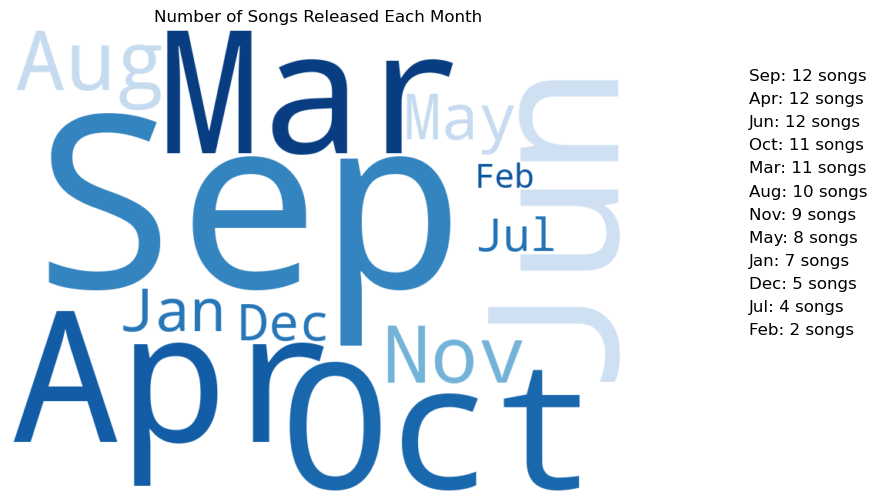

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each month
month_counts = Counter(Most_streamed['Month'])

# Sort the month counts by the count values in descending order
sorted_month_counts = dict(sorted(month_counts.items(), key=lambda x: x[1], reverse=True))

# Create a WordCloud object with a blue colormap
wordcloud = WordCloud(width=800, height=600, colormap='Blues', background_color='white').generate_from_frequencies(sorted_month_counts)

# Display the WordCloud
plt.figure(figsize=(8, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Number of Songs Released Each Month')

# Annotate the WordCloud with the count for each month
vertical_offset = 0
for month, count in sorted_month_counts.items():
    plt.text(1.2, 0.9 - vertical_offset, f"{month}: {count} songs", fontsize=12, ha='left', va='center', transform=plt.gca().transAxes)
    vertical_offset += 0.05

plt.show()


In [22]:
import plotly.express as px

# Get unique artists
unique_artists = merged_df['Genre'].unique()

# Define a color map with different shades of green for each artist
color_map = {artist: px.colors.sequential.Blues[i % len(px.colors.sequential.Blues)]
             for i, artist in enumerate(unique_artists)}

# Create the scatter plot
fig = px.scatter(merged_df, x="Weeks", y="Streams(billions)", size="Avs.", color="Genre",
                 hover_name="Song", size_max=60, color_discrete_map=color_map)

# Update layout to set background color to white and add grid lines
fig.update_layout(
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(showgrid=True, gridcolor='black'),  # Show x-axis grid lines and set color to black
    yaxis=dict(showgrid=True, gridcolor='black'),  # Show y-axis grid lines and set color to black
)

# Show the plot
fig.show()


In [23]:
import plotly.figure_factory as ff

# Calculate correlation matrix
matrix = merged_df.corr()

# Create custom annotation text
annot_text = [[f'{matrix.iloc[i, j]:.2f}' for j in range(matrix.shape[1])] for i in range(matrix.shape[0])]

# Create the heatmap using Plotly figure factory
fig = ff.create_annotated_heatmap(z=matrix.values,
                                   x=matrix.columns.tolist(),
                                   y=matrix.columns.tolist(),
                                   annotation_text=annot_text,
                                   colorscale='Blues',  # Change the color scale
                                   colorbar=dict(title='Correlation'),  # Add color bar with title
                                   showscale=True)  # Show color scale

# Update layout to add title and adjust margin
fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(title='Features', side='bottom'),  # Move x-axis labels to bottom
                  yaxis=dict(title='Features'),  # Y-axis title
                  margin=dict(l=150, r=150, t=100, b=100),
                  coloraxis_colorbar=dict(x=0.9, title='Correlation'))  # Position of color scale

# Show the interactive plot
fig.show()
